# Header

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spinmob as s
from scipy import interpolate as interpolate
from scipy import integrate as integrate
import os
%matplotlib notebook

In [2]:
# check directory
os.chdir("D:\Raphael\Dropbox\Mcgill\PHYS512_CompPhys\Assignement2")
os.getcwd()

'D:\\Raphael\\Dropbox\\Mcgill\\PHYS512_CompPhys\\Assignement2'

## Defining some functions

In [3]:
def x3(x):
    return x**3

In [4]:
def cos(x):
    return np.cos(x)

In [5]:
def sin(x):
    return np.sin(x)

In [6]:
def exp(x):
    return np.exp(x)

In [7]:
def ln2(x):
    return np.log2(x)

In [8]:
# Remapping ln2 in the [-1,1]  range.
def ln2_remap(x):
    return ln2((x+3)/4)

# Problem 1 (COMPLETED)

Write a recursive variable step size integrator like the one we wrote in class that does NOT call f(x) multiple times for the same x. For a few typical examples, how many function calls do you save vs. the lazy way we wrote it in class?

In [9]:
# Function wrote in class.

def integrate_step(fun,tol,x1,x2):
    
    x=np.linspace(x1,x2,5)
    y=fun(x)
    nb_eval = len(x) #let's keep track of function evaluations
    
    # Uncomment the next line to see the integration limits for each recursion and the total number of f(x) evaluation.
    #print('integrating from ',x1,' to ',x2,"/ Nb eval:",nb_eval)
    
    area1=(x2-x1)*(y[0]+4*y[2]+y[4])/6
    area2=(x2-x1)*( y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12
    myerr=np.abs(area1-area2)
    if myerr<tol:
        return area2, nb_eval
    else:
        xm=0.5*(x1+x2)
        a1, nb_eval_1 = integrate_step(fun,tol/2,x1,xm)
        a2, nb_eval_2 = integrate_step(fun,tol/2,xm,x2)
        nb_eval = nb_eval + nb_eval_1 + nb_eval_2
        return a1+a2, nb_eval

In [10]:
# New function. For every call which is not the first one, I keep 3 f(x) values from 
# the last recursion so that I only evaluate f(x) 2 times instead of 5 times.

def new_integrate_step(fun,tol, x1,x2, y0=0.0,y1=0.0,y2=0.0, rec = 0):
    
    if rec == 0: #If this is not a recursive call (i.e. the first call)
        x=np.linspace(x1,x2,5)
        y=fun(x)
        nb_eval = len(x) #let's keep track of function evaluations
    
    if rec == 1: #If this  is a recursive call (i.e. not the first call)
        x=np.linspace(x1,x2,5)
        y = np.zeros(5)
        y[0] = y0
        y[1] = fun(x[1])
        y[2] = y1
        y[3] = fun(x[3])
        y[4] = y2
        nb_eval = 2
        
    # Uncomment the next line to see the integration limits for each recursion and the total number of f(x) evaluation.
    #print('integrating from ',x1,' to ',x2,"/ Nb eval:",nb_eval)
           
    area1=(x2-x1)*(y[0]+4*y[2]+y[4])/6
    area2=(x2-x1)*( y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12
    myerr=np.abs(area1-area2)
    if myerr<tol:
        return area2, nb_eval
    else:
        #print("nb_call = ",nb_call)
        xm=0.5*(x1+x2)
        a1, nb_eval_1 = new_integrate_step(fun,tol/2, x1,xm, y[0],y[1],y[2], rec=1)
        a2, nb_eval_2 = new_integrate_step(fun,tol/2, xm,x2, y[2],y[3],y[4], rec=1)
        nb_eval = nb_eval + nb_eval_1 + nb_eval_2
        return a1+a2, nb_eval

Let's now test the new integrator for 3 functions. 

In each case, I will compute the exact value, the old integrator value, the new integrator value, the number of f(x) call for both integrator an

In [11]:
# Defining a comparaison function:
def comp(fun, ans_exact, a, b, tol):
    ans_old, nb_eval_old = integrate_step(fun,tol,a,b)
    ans_new, nb_eval_new = new_integrate_step(fun,tol,a,b)
    print("Function :",fun.__name__)
    print("[Old integrator] Value:",ans_old,"/Error:",ans_old-ans_exact,"/Nb f(x) eval:",nb_eval_old)
    print("[New integrator] Value:",ans_new,"/Error:",ans_new-ans_exact,"/Nb f(x) eval:",nb_eval_new)
    print("Difference in evaluation b/w the 2 integrators:",ans_old - ans_new)
    print(nb_eval_old - nb_eval_new,"saved f(x) evaluation(s)")

In [12]:
# x^3 from 0 to 10
fun = x3
a = 0
b = 10
tol = 1e-10

ans_exact = b**4/4 - a**4/4
comp(fun,ans_exact, a,b,tol)

Function : x3
[Old integrator] Value: 2500.0 /Error: 0.0 /Nb f(x) eval: 5
[New integrator] Value: 2500.0 /Error: 0.0 /Nb f(x) eval: 5
Difference in evaluation b/w the 2 integrators: 0.0
0 saved f(x) evaluation(s)


In [13]:
# cos(x) from 0 to pi/2
fun = cos
a = 0
b = np.pi/2
tol = 1e-10

ans_exact = sin(b) - sin(a)
comp(fun,ans_exact,a,b,tol)

Function : cos
[Old integrator] Value: 1.00000000000178 /Error: 1.779909553079051e-12 /Nb f(x) eval: 1035
[New integrator] Value: 1.00000000000178 /Error: 1.779909553079051e-12 /Nb f(x) eval: 417
Difference in evaluation b/w the 2 integrators: 0.0
618 saved f(x) evaluation(s)


In [14]:
# exp(x) from -1 to 1
fun = exp
a = -1
b = 1
tol = 1e-10

ans_exact = exp(b) - exp(a)
comp(fun,ans_exact,a,b,tol)

Function : exp
[Old integrator] Value: 2.350402387290492 /Error: 2.8892443992845074e-12 /Nb f(x) eval: 1305
[New integrator] Value: 2.350402387290492 /Error: 2.8892443992845074e-12 /Nb f(x) eval: 525
Difference in evaluation b/w the 2 integrators: 0.0
780 saved f(x) evaluation(s)


# Problem 2
Write a function that models the log base 2 of x valid from 0.5 to 1 to an accuracy in the region better than 10−6
. Please use a truncated Chebyshev polynomial fit to do this, and please write your own fit routine (instead of just calling the numpy one). How many terms do you need? Carry out a polynomial fit of the same order (we’ll see how to do this ourselves in
coming lectures, but for now I suggest just calling np.polynomial.legendre.legfit, which will be more stable than np.polyfit). Plot the residuals for both the truncated Chebyshev and standard polynomial fits. Which one has higher RMS error? Which one has a larger max error?

In [15]:
def cheb_fit(fun,ord):
    x=np.linspace(-1,1,ord+1)
    y=fun(x)
    mat=np.zeros([ord+1,ord+1])
    mat[:,0]=1
    mat[:,1]=x
    for i in range(1,ord):
        mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
    coeffs=np.linalg.inv(mat)@y
    return coeffs

In [16]:
def cheb_poly(x,nb_coeff):
    assert(nb_coeff>3)
    T = np.zeros(shape=(nb_coeff, len(x)))
    T[0] = np.zeros(len(x)) + 1
    T[1] = x
    for i in range(nb_coeff-2):
        j = i+2
        T[j] = 2*x*T[j-1] - T[j-2]
    return T

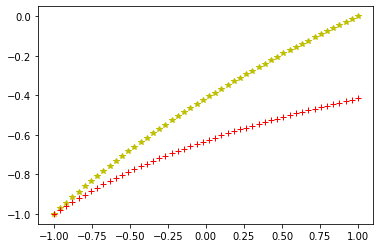

In [17]:
fun=ln2_remap
coeffs=cheb_fit(fun,51)
x = np.linspace(-1,1,50)
T = cheb_poly(fun(x),len(coeffs))

cheb = 0
for i in range(len(coeffs)):
    cheb = cheb + coeffs[i]*T[i]
    
plt.plot(x,fun(x),"y*")
plt.plot(x,cheb,"r+")

# Problem 3 a)  (COMPLETED)
Write a program to solve for the decay products of U238 (refer to slides for the decay chain). You can use the ODE solver from scipy, but you’ll need to set the problem up properly. Please make sure to include all the decay prodcuts in the chain. Assume you start from a sample of pure U238 (in nature, this sort of separation happens chemically when rocks are formed).
Which solver would you use for this problem?

In [69]:
def decay(x,y): 
    # 14 step half-life
    half_life = np.zeros(14)
    half_life[0] = 4.468e9*365.25*24.0*3600*10**6
    half_life[1] = 24.1*24.0*3600*10**6
    half_life[2] = 6.7*3600*10**6
    half_life[3] = 245500*365.25*24*3600*10**6
    half_life[4] = 75380*365.25*24*3600*10**6
    half_life[5] = 1600*365.25*24*3600*10**6
    half_life[6] = 3.8235*24*3600*10**6
    half_life[7] = 3.10*60*10**6
    half_life[8] = 26.8*60*10**6
    half_life[9] = 19.9*60*10**6
    half_life[10] = 164.3
    half_life[11] = 22.3*365.25*24*3600*10**6
    half_life[12] = 5.015*365.25*24*3600*10**6
    half_life[13] = 138.376*24*3600*10**6
        
    dydx = np.zeros(len(half_life)+1)
    dydx[0] = -y[0]/half_life[0]
    for i in range(1,14):
        dydx[i] = y[i-1]/half_life[i-1] - y[i]/half_life[i]
    dydx[14] = y[13]/half_life[13]
    return dydx

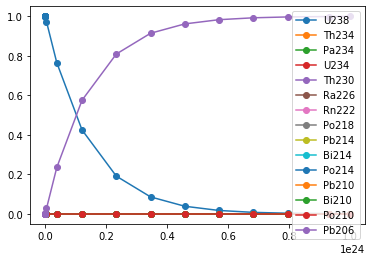

In [71]:
elements = ["U238","Th234","Pa234","U234","Th230","Ra226","Rn222","Po218","Pb214","Bi214","Po214","Pb210","Bi210","Po210","Pb206"]
y0 = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
x0 = 0
x1 = 1e24
ans = integrate.solve_ivp(decay,[x0,x1],y0,method='Radau')

for i,name in enumerate(elements):
    plt.plot(ans.t,ans.y[i],"-o",label=name)
plt.legend()

# Problem 3 b) (COMPLETED)
Plot the ratio of Pb206 to U238 as a function of time over a region where it’s interesting. Does this make sense analytically? (If you look at the decay chain, all the half-lives are short compared to U238, so you can approximate the U238 decaying instantly to lead. Now plot the ratio of Thorium 230 to U234 over a region where that is interesting. Radioactive decay is frequently used to date rocks, and these results point at how you can determine the age of a uranium-bearing rock that is anywhere from thousands to billions of years old. (Of course, in this case the starting ratio of U234 to U238 would probably have already reached its long-term average when the rock was formed, but you could still use the U234/Th230 ratio under that assumption.)

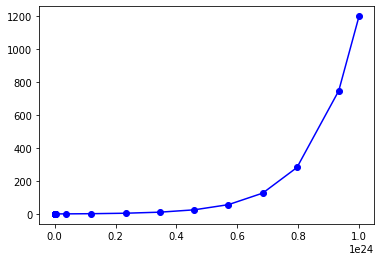

In [95]:
# Ratio of Pb206/U238
plt.plot(ans.t,ans.y[14]/ans.y[0],"-ob")

It does makes sense analytically. The more times passes, the less U238 is left (almost none at 1e24 microseconds); thus the ratio blows up as times passes.

(-1e+19, 1e+20)

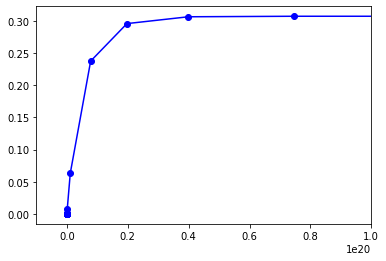

In [94]:
# Ratio of Pb206/U238
plt.plot(ans.t,ans.y[4]/ans.y[3],"-ob")
plt.xlim(0-1e19,1e20)